In [1]:
import sys
sys.path.append('../src')

from data_loader import load_data, preprocess_data
from recommender import build_trainset, user_based_cf, item_based_cf
from evaluation import compute_rmse, precision_recall_at_k
from surprise.model_selection import train_test_split
import json
import matplotlib.pyplot as plt

import os
os.chdir("..")

In [2]:
ratings, items, users = load_data()
ratings_clean = preprocess_data(ratings)

In [3]:
from surprise import Dataset, Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_clean[['user_id', 'item_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)


In [4]:
algo_user = user_based_cf(trainset)
algo_item = item_based_cf(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [5]:
predictions_user = algo_user.test(testset)
predictions_item = algo_item.test(testset)


In [6]:
rmse_user = compute_rmse(predictions_user)
precision_user, recall_user = precision_recall_at_k(predictions_user)

rmse_item = compute_rmse(predictions_item)
precision_item, recall_item = precision_recall_at_k(predictions_item)

In [7]:
results = {
    'user_based': {
        'RMSE': rmse_user,
        'Precision@10': precision_user,
        'Recall@10': recall_user
    },
    'item_based': {
        'RMSE': rmse_item,
        'Precision@10': precision_item,
        'Recall@10': recall_item
    }
}

In [8]:
with open('results/evaluation_metrics.json', 'w') as f:
    json.dump(results, f, indent=4)

print("\nEvaluation metrics saved!")


Evaluation metrics saved!


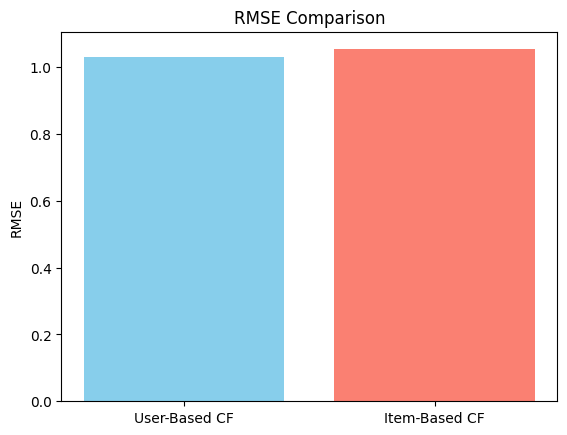

In [9]:
labels = ['User-Based CF', 'Item-Based CF']
rmse_scores = [rmse_user, rmse_item]

plt.bar(labels, rmse_scores, color=['skyblue', 'salmon'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()
